In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('C:\\Users\\KimDongyoung\\Desktop\\LG aimers 5기\\Lg_aimers5\\Lg_aimers5\\data\\df_merged.csv')

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_16256\986053769.py:1: DtypeWarning: Columns (26,116,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\KimDongyoung\\Desktop\\LG aimers 5기\\Lg_aimers5\\Lg_aimers5\\data\\df_merged.csv')


In [5]:
df

,Wip Line - Dam,Process Desc. - Dam,Equipment - Dam,Model.Suffix - Dam,Workorder - Dam,Set ID,Collect Date - Dam,Insp. Seq No. - Dam,Insp Judge Code - Dam,Collect Result - Dam,...,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,2023-05-04 09:11:35,1,OK,240.0,...,91.8,270.0,50,85,18.200,5.0,2,1,0,AbNormal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,2023-05-04 09:13:19,1,OK,240.0,...,91.8,270.0,50,85,18.400,6.0,3,1,0,AbNormal
2,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000007,2023-05-04 09:19:31,1,OK,240.0,...,91.8,270.0,50,85,18.600,1.0,6,1,0,AbNormal
3,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000011,2023-05-04 11:19:55,1,OK,240.0,...,91.8,270.0,50,85,18.200,4.0,18,1,0,AbNormal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000024,2023-05-05 09:35:48,1,OK,240.0,...,91.8,270.0,50,85,18.100,6.0,12,1,0,AbNormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002680,2024-04-28 18:25:20,1,OK,240.0,...,50.0,91.8,270,50,114.612,18.8,2,430,1,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002681,2024-04-28 18:26:27,1,OK,1000.0,...,50.0,91.8,270,50,114.612,19.0,9,431,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002682,2024-04-28 18:27:27,1,OK,240.0,...,50.0,91.8,270,50,114.612,19.3,3,432,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002684,2024-04-28 18:29:36,1,OK,240.0,...,50.0,91.8,270,50,114.612,19.6,4,434,1,Normal


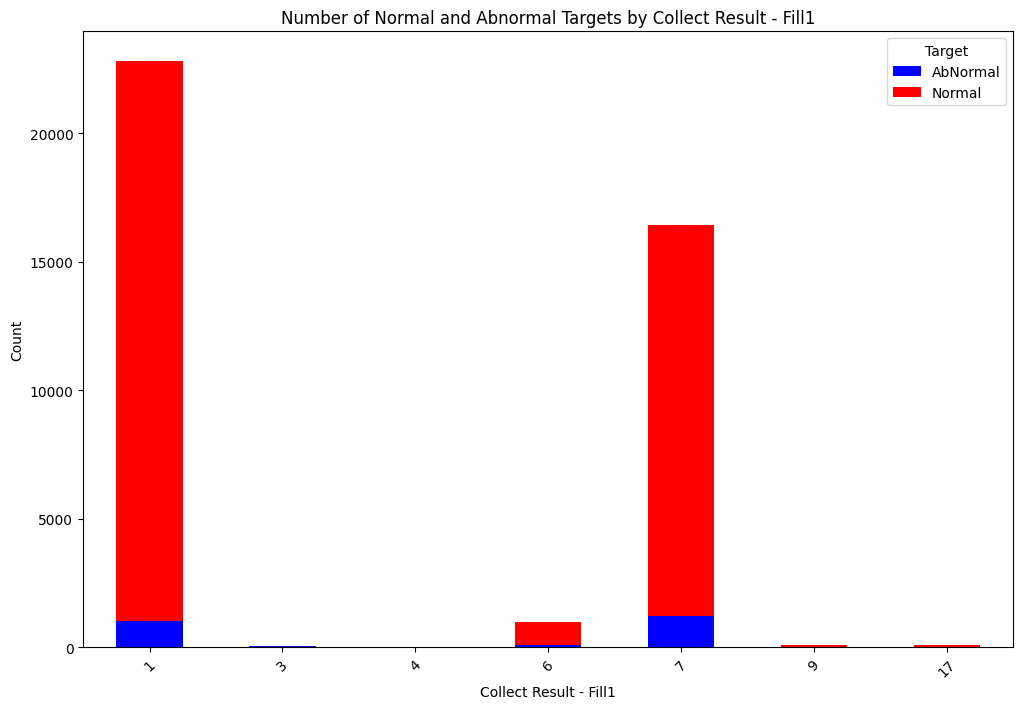

In [15]:
# Grouping by 'Collect Result - Fill1' and counting the target values
fill1_collect_group = df.groupby(['Collect Result.29 - Fill1', 'target']).size().reset_index(name='count')

# Pivot the data to have 'Collect Result - Fill1' as index and target values as columns
fill1_collect_pivot = fill1_collect_group.pivot(index='Collect Result.29 - Fill1', columns='target', values='count').fillna(0)

# Creating a stacked bar plot
fill1_collect_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Collect Result - Fill1')
plt.ylabel('Count')
plt.title('Number of Normal and Abnormal Targets by Collect Result - Fill1')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.show()

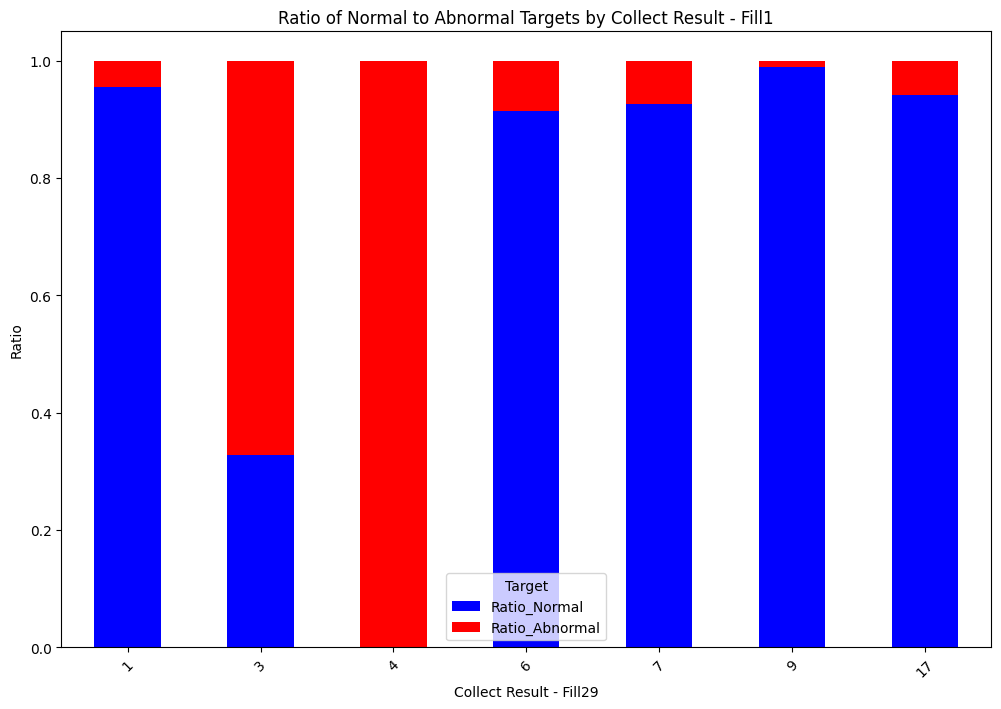

In [16]:
# Calculating the ratio of normal to abnormal targets for each 'Collect Result - Fill1'
fill1_collect_pivot['Total'] = fill1_collect_pivot.sum(axis=1)
fill1_collect_pivot['Ratio_Normal'] = fill1_collect_pivot['Normal'] / fill1_collect_pivot['Total']
fill1_collect_pivot['Ratio_Abnormal'] = fill1_collect_pivot['AbNormal'] / fill1_collect_pivot['Total']

# Plotting the ratio
fill1_collect_pivot[['Ratio_Normal', 'Ratio_Abnormal']].plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Collect Result - Fill29')
plt.ylabel('Ratio')
plt.title('Ratio of Normal to Abnormal Targets by Collect Result - Fill1')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.show()

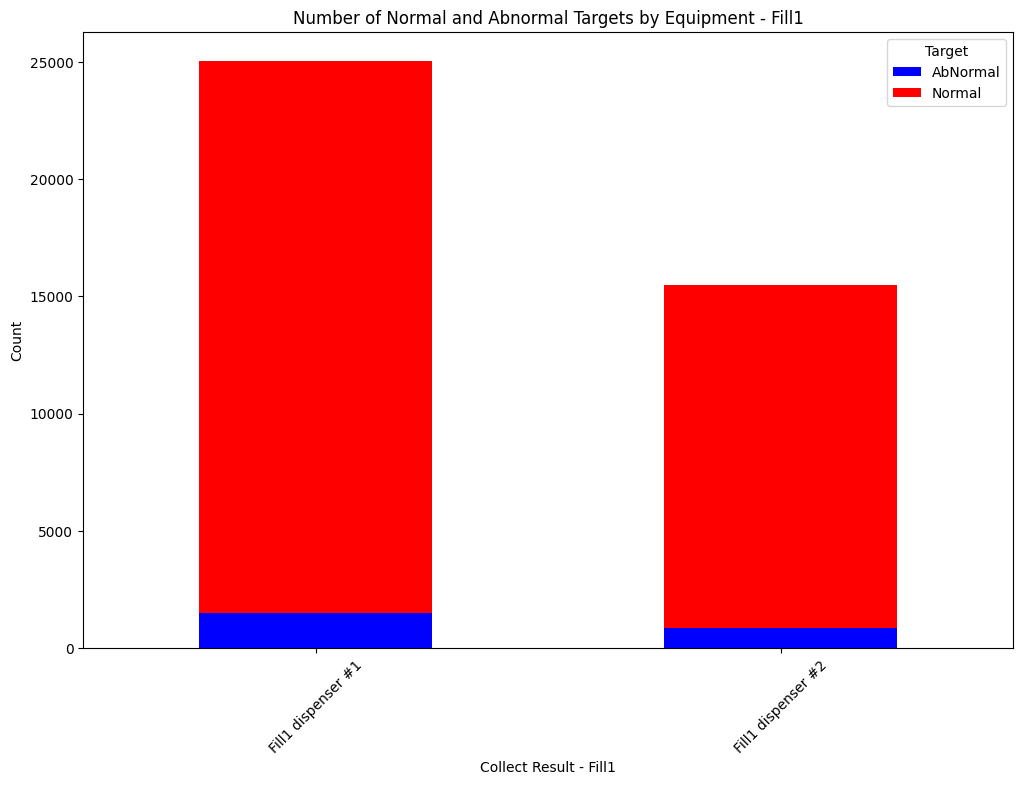

In [17]:
collect_group = df.groupby(['Equipment - Fill1', 'target']).size().reset_index(name='count')

# Pivot the data to have 'Collect Result - Fill1' as index and target values as columns
collect_pivot = collect_group.pivot(index='Equipment - Fill1', columns='target', values='count').fillna(0)

# Creating a stacked bar plot
collect_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Collect Result - Fill1')
plt.ylabel('Count')
plt.title('Number of Normal and Abnormal Targets by Equipment - Fill1')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.show()

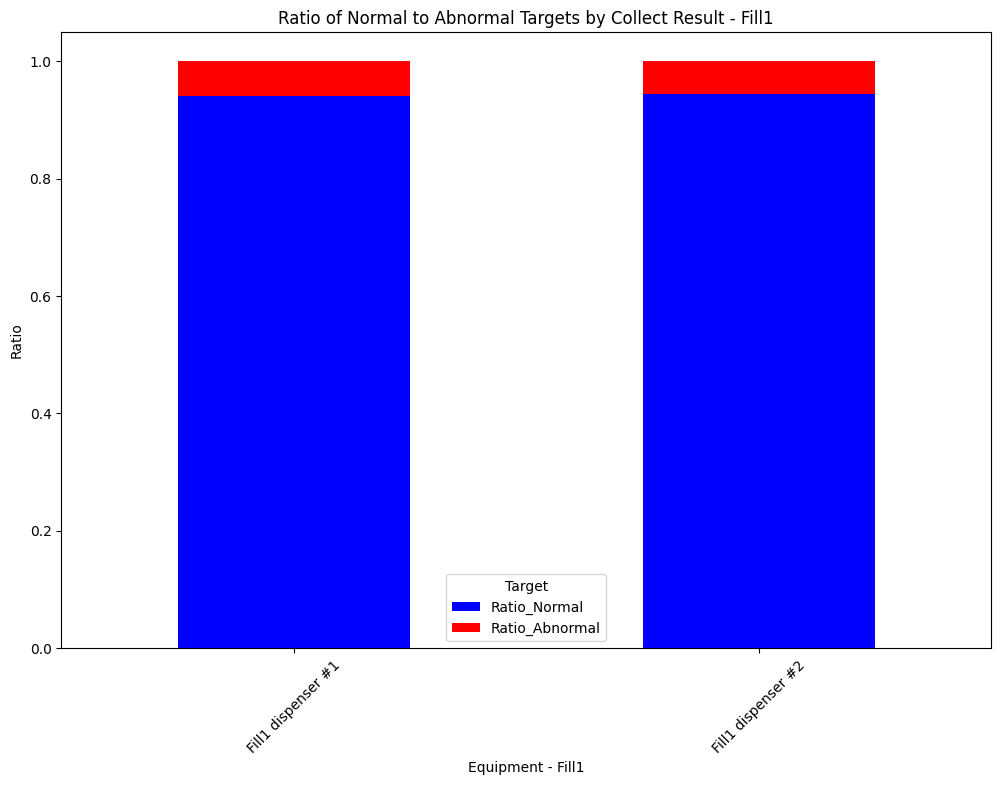

In [18]:
# Calculating the ratio of normal to abnormal targets for each 'Collect Result - Fill1'
collect_pivot['Total'] = collect_pivot.sum(axis=1)
collect_pivot['Ratio_Normal'] = collect_pivot['Normal'] / collect_pivot['Total']
collect_pivot['Ratio_Abnormal'] = collect_pivot['AbNormal'] / collect_pivot['Total']

# Plotting the ratio
collect_pivot[['Ratio_Normal', 'Ratio_Abnormal']].plot(kind='bar', stacked=True, figsize=(12, 8), color=['blue', 'red'])
plt.xlabel('Equipment - Fill1')
plt.ylabel('Ratio')
plt.title('Ratio of Normal to Abnormal Targets by Collect Result - Fill1')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Grouping by 'Collect Result.25 - Fill1' and 'target' to count occurrences
collect25_target_group = df.groupby(['Collect Result.25 - Fill1', 'target']).size().reset_index(name='count')

# Pivot the data to have 'Collect Result.25 - Fill1' as index and target values as columns
collect25_target_pivot = collect25_target_group.pivot(index='Collect Result.25 - Fill1', columns='target', values='count').fillna(0)

# Calculating the ratio of normal to abnormal targets for each 'Collect Result.25 - Fill1'
collect25_target_pivot['Total'] = collect25_target_pivot.sum(axis=1)
collect25_target_pivot['Ratio_Normal'] = collect25_target_pivot['Normal'] / collect25_target_pivot['Total']
collect25_target_pivot['Ratio_Abnormal'] = collect25_target_pivot['AbNormal'] / collect25_target_pivot['Total']

collect25_target_pivot[['Ratio_Normal', 'Ratio_Abnormal']]

# Sorting the data by the highest 'Ratio_Abnormal' in descending order
sorted_ratio_data = collect25_target_pivot[['Ratio_Normal', 'Ratio_Abnormal']].sort_values(by='Ratio_Abnormal', ascending=False)

In [25]:
sorted_ratio_data.head(30)

target,Ratio_Normal,Ratio_Abnormal
Collect Result.25 - Fill1,,
40.3,0.000000,1.000000
75.3,0.000000,1.000000
56.1,0.000000,1.000000
63.1,0.000000,1.000000
63.2,0.000000,1.000000
64.2,0.000000,1.000000
67.6,0.000000,1.000000
84.7,0.000000,1.000000
68.5,0.000000,1.000000


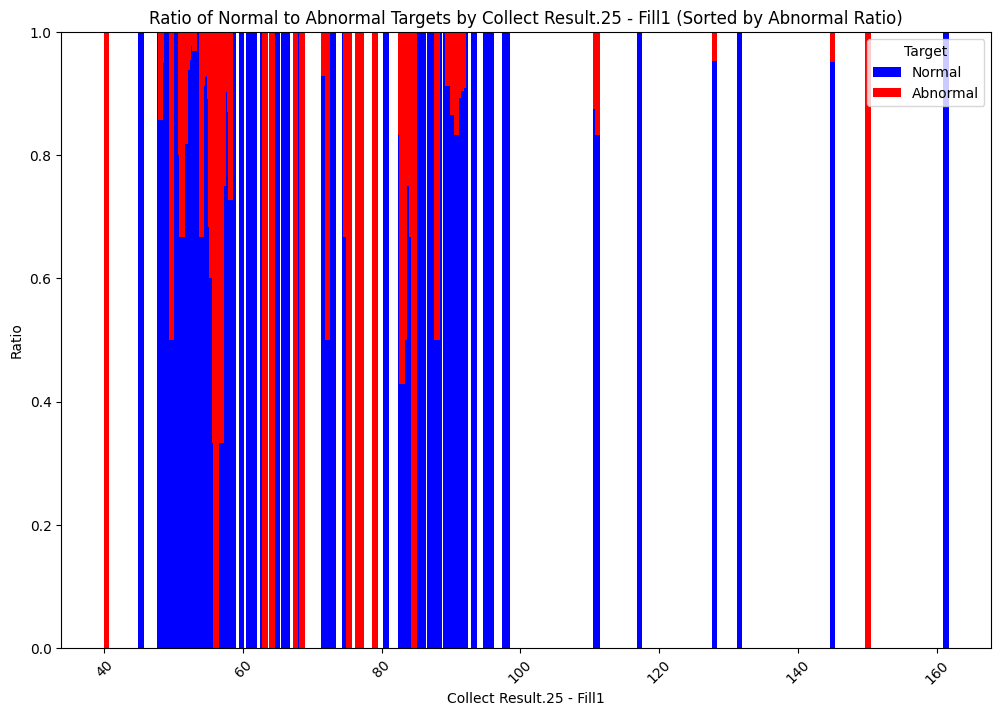

In [22]:
# Sorting the data by the highest 'Ratio_Abnormal' in descending order
sorted_ratio_data = collect25_target_pivot[['Ratio_Normal', 'Ratio_Abnormal']].sort_values(by='Ratio_Abnormal', ascending=False)

# Plotting the sorted ratio data
plt.figure(figsize=(12, 8))
plt.bar(sorted_ratio_data.index, sorted_ratio_data['Ratio_Normal'], label='Normal', color='blue')
plt.bar(sorted_ratio_data.index, sorted_ratio_data['Ratio_Abnormal'], bottom=sorted_ratio_data['Ratio_Normal'], label='Abnormal', color='red')
plt.xlabel('Collect Result.25 - Fill1')
plt.ylabel('Ratio')
plt.title('Ratio of Normal to Abnormal Targets by Collect Result.25 - Fill1 (Sorted by Abnormal Ratio)')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Creating a new derived variable by combining 'Model.Suffix - Fill1' and 'Workorder - Fill1'
df['Model_Workorder'] = df['Model.Suffix - Fill1'] + ' - ' + df['Workorder - Fill1']

# Display the first few rows to confirm the new derived variable
df[['Model.Suffix - Fill1', 'Workorder - Fill1', 'Model_Workorder']].head()

,Model.Suffix - Fill1,Workorder - Fill1,Model_Workorder
0,AJX75334501,3F1X5847-2,AJX75334501 - 3F1X5847-2
1,AJX75334501,3F1X5847-2,AJX75334501 - 3F1X5847-2
2,AJX75334501,3F1X5847-2,AJX75334501 - 3F1X5847-2
3,AJX75334501,3F1X5847-2,AJX75334501 - 3F1X5847-2
4,AJX75334501,3F1X5847-2,AJX75334501 - 3F1X5847-2


In [29]:
# Grouping by the new 'Model_Workorder' and 'target' to count occurrences
model_workorder_target_group = df.groupby(['Model_Workorder', 'target']).size().reset_index(name='count')

# Pivot the data to have 'Model_Workorder' as index and target values as columns
model_workorder_target_pivot = model_workorder_target_group.pivot(index='Model_Workorder', columns='target', values='count').fillna(0)

# Sorting the data by the number of 'AbNormal' targets in descending order
sorted_model_workorder_target_pivot = model_workorder_target_pivot.sort_values(by='AbNormal', ascending=False)

# Display the sorted data
sorted_model_workorder_target_pivot

target,AbNormal,Normal
Model_Workorder,,
AJX75334503 - 3HPXX066-0001,43.0,45.0
AJX75334501 - 3G1XC632-1,25.0,100.0
AJX75334502 - 3I1XA992-1,23.0,93.0
AJX75334501 - 3F1XC600-1,23.0,72.0
AJX75334501 - 3M1XH425-1,23.0,159.0
...,...,...
AJX75334501 - 3L1X9929-1,0.0,71.0
AJX75334501 - 3L1X9929-2,0.0,42.0
AJX75334501 - 3HPXX125-0001,0.0,10.0


In [31]:
# Pivot the data to have 'Model_Workorder' as index and target values as columns
model_workorder_target_pivot = model_workorder_target_group.pivot(index='Model_Workorder', columns='target', values='count').fillna(0)

# Sorting the data by the number of 'AbNormal' targets in descending order
sorted_model_workorder_target_pivot = model_workorder_target_pivot.sort_values(by='AbNormal', ascending=False)

# Calculating the composition ratio for each 'Model_Workorder'
sorted_model_workorder_target_pivot['Total'] = sorted_model_workorder_target_pivot.sum(axis=1)
sorted_model_workorder_target_pivot['Ratio_Normal'] = sorted_model_workorder_target_pivot['Normal'] / sorted_model_workorder_target_pivot['Total']
sorted_model_workorder_target_pivot['Ratio_Abnormal'] = sorted_model_workorder_target_pivot['AbNormal'] / sorted_model_workorder_target_pivot['Total']

# Displaying the composition ratio
sorted_composition_ratio = sorted_model_workorder_target_pivot[['Ratio_Normal', 'Ratio_Abnormal']]

# Display the sorted composition ratio data
sorted_composition_ratio.head(10)

target,Ratio_Normal,Ratio_Abnormal
Model_Workorder,,
AJX75334503 - 3HPXX066-0001,0.511364,0.488636
AJX75334501 - 3G1XC632-1,0.800000,0.200000
AJX75334502 - 3I1XA992-1,0.801724,0.198276
AJX75334501 - 3F1XC600-1,0.757895,0.242105
AJX75334501 - 3M1XH425-1,0.873626,0.126374
AJX75334501 - 4B1XE009-1,0.704225,0.295775
AJX75334501 - 3H1X7984-1,0.823009,0.176991
AJX75334501 - 3G1XA501-1,0.851852,0.148148
AJX75334501 - 3G1X8293-1,0.888889,0.111111


In [33]:
# Extracting the columns related to 'Collect Result' and 'target'
collect_result_columns = [col for col in df.columns if 'Collect Result' in col]
collect_result_columns.append('target')

# Creating a new DataFrame with only the selected columns
df_collect_result_target = df[collect_result_columns]

# Converting all 'Collect Result' columns to numeric, coercing errors to NaN
for col in collect_result_columns[:-1]:  # Excluding 'target' column
    df_collect_result_target[col] = pd.to_numeric(df_collect_result_target[col], errors='coerce')

# Calculating the average of each 'Collect Result' column grouped by 'target'
average_collect_result = df_collect_result_target.groupby('target').mean()

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_16256\250173306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collect_result_target[col] = pd.to_numeric(df_collect_result_target[col], errors='coerce')


In [34]:
average_collect_result 

,Collect Result - Dam,Collect Result.1 - Dam,Collect Result.2 - Dam,Collect Result.3 - Dam,Collect Result.4 - Dam,Collect Result.5 - Dam,Collect Result.6 - Dam,Collect Result.7 - Dam,Collect Result.8 - Dam,Collect Result.9 - Dam,...,Collect Result.30 - Fill2,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2
target,,,,,,,,,,,,,,,,,,,,,
AbNormal,519.744681,6.180851,-23.744681,73.142553,1150.0,33.5,0.0,753.936170,33.5,-23.744681,...,83.589787,71.451404,183.250723,157.097872,67.961702,54.674257,12.887574,93.160000,81.602553,0.741702
Normal,531.025265,6.329280,-21.072964,73.908560,1150.0,33.5,0.0,742.804015,33.5,-21.072964,...,91.438699,66.696556,162.980056,182.123388,63.980370,62.503109,14.478211,72.331245,110.359839,0.773220


In [35]:
output_file_path = 'average_collect_result.csv'
average_collect_result.to_csv(output_file_path)

In [36]:
# Creating a new DataFrame with only the selected columns
df_collect_result_target2 = df[collect_result_columns]

# Converting all 'Collect Result' columns to numeric, coercing errors to NaN
for col in collect_result_columns[:-1]:  # Excluding 'target' column
    df_collect_result_target2[col] = pd.to_numeric(df_collect_result_target2[col], errors='coerce')

# Calculating the median of each 'Collect Result' column grouped by 'target'
median_collect_result = df_collect_result_target2.groupby('target').median()

# Saving the median_collect_result DataFrame to a CSV file
output_file_path = 'median_collect_result.csv'
median_collect_result.to_csv(output_file_path)

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_16256\2988430576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collect_result_target2[col] = pd.to_numeric(df_collect_result_target2[col], errors='coerce')
